In [1]:
import pandas as pd

In [2]:
path_data = '../dataset/complaints_v1.csv'

df = pd.read_csv(path_data, index_col=0)

In [3]:
df = df.reset_index(drop=True)

In [4]:
df.head()

,product_5,narrative,Product,Date received,Sub-product,Issue,Sub-issue,Company,State,Timely response?
0,Credit Reporting,Dear Possible Financial Inc you guyss aree rep...,Credit reporting or other personal consumer re...,2024-07-27,Credit reporting,Incorrect information on your report,Account information incorrect,Possible Financial Inc,MI,Yes
1,Debt Collection,"XXXX XXXX XXXX ( debt collector ), sent my boy...",Debt collection,2024-07-27,I do not know,Threatened to contact someone or share informa...,Talked to a third-party about your debt,BlueChip Financial,TX,Yes
2,Credit Reporting,I been receiving alerts my information was fou...,Credit reporting or other personal consumer re...,2024-07-23,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,FC HoldCo LLC,SC,Yes
3,Credit Reporting,Subject : Dispute of Inaccurate Information on...,Credit reporting or other personal consumer re...,2024-07-27,Credit reporting,Improper use of your report,Reporting company used your report improperly,CORELOGIC INC,GA,Yes
4,Loans,They allowed me to use the account for about a...,"Payday loan, title loan, personal loan, or adv...",2024-07-26,Payday loan,Received a loan you didn't apply for,NaN,MoneyLion Inc.,PA,Yes


In [5]:
df_sample = df.sample(frac=0.4, random_state=42)

df_sample.head()

,product_5,narrative,Product,Date received,Sub-product,Issue,Sub-issue,Company,State,Timely response?
987231,Debt Collection,XXXX CONTINUES TO PUBLISH THE FOLLOWING INFOR...,Debt collection,2018-07-21,I do not know,Attempts to collect debt not owed,Debt was result of identity theft,"Bread Financial Holdings, Inc.",MI,Yes
79954,Credit Reporting,My credit reports are inaccurate. These inaccu...,Credit reporting or other personal consumer re...,2024-04-30,Credit reporting,Improper use of your report,Reporting company used your report improperly,"EQUIFAX, INC.",NJ,Yes
567130,Credit Reporting,I had disputed an account that was open fraudu...,Credit reporting or other personal consumer re...,2023-09-01,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,SYNCHRONY FINANCIAL,PR,Yes
500891,Credit Reporting,This is one of my NUMEROUS request that I have...,Credit reporting or other personal consumer re...,2023-09-07,Credit reporting,Incorrect information on your report,Information belongs to someone else,Experian Information Solutions Inc.,NJ,Yes
55399,Loans,"I would like to request your assistance, as XX...",Mortgage,2024-06-01,Conventional home mortgage,Trouble during payment process,"Escrow, taxes, or insurance","Fay Servicing, LLC",CA,Yes


In [6]:
print(df_sample.shape)

(400000, 10)


In [7]:
print(df_sample.dtypes)

product_5           object
narrative           object
Product             object
Date received       object
Sub-product         object
Issue               object
Sub-issue           object
Company             object
State               object
Timely response?    object
dtype: object


In [8]:
(
    df_sample
    .isnull()
    .any()
)

product_5           False
narrative           False
Product             False
Date received       False
Sub-product          True
Issue               False
Sub-issue            True
Company             False
State                True
Timely response?    False
dtype: bool

In [9]:
# conteo de nulos
(
    df_sample
    .isnull()
    .sum()
)

product_5               0
narrative               0
Product                 0
Date received           0
Sub-product           486
Issue                   0
Sub-issue           26667
Company                 0
State                1307
Timely response?        0
dtype: int64


Bad key mathtext.fallback_to_cm in file /home/diego/.config/matplotlib/stylelib/belle2_serif.mplstyle, line 27 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.10.0/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file /home/diego/.config/matplotlib/stylelib/belle2.mplstyle, line 36 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.10.0/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution


<Axes: ylabel='count'>

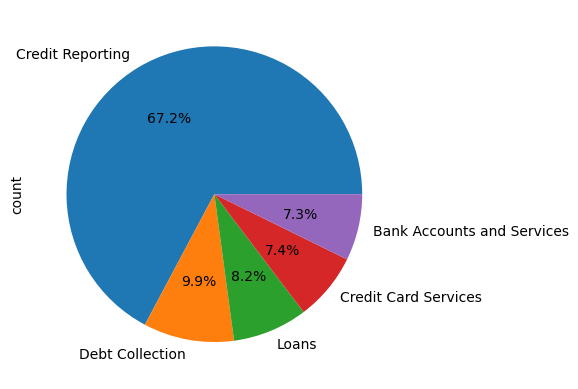

In [10]:
# Loans, Credit Reporting, Bank Accounts and Services, Debt Collection, and Credit Card Services.
# Préstamos, informes crediticios, cuentas y servicios bancarios, 
# cobranza de deudas y servicios de tarjetas de crédito.
(
    df_sample
    .product_5
    .value_counts()
    .plot(kind='pie', autopct='%1.1f%%')
)

In [11]:
df_sample['Date received'] = pd.to_datetime(df_sample['Date received'])

df_sample['Year'] = df_sample['Date received'].dt.year

In [12]:
df_grouped_year = (
    df_sample
    .groupby(['Year', 'product_5'])
    .size()
    .reset_index(name='Complaints')
)

df_grouped_year.head()

,Year,product_5,Complaints
0,2015,Bank Accounts and Services,26
1,2015,Credit Card Services,41
2,2015,Credit Reporting,51
3,2015,Debt Collection,105
4,2015,Loans,424


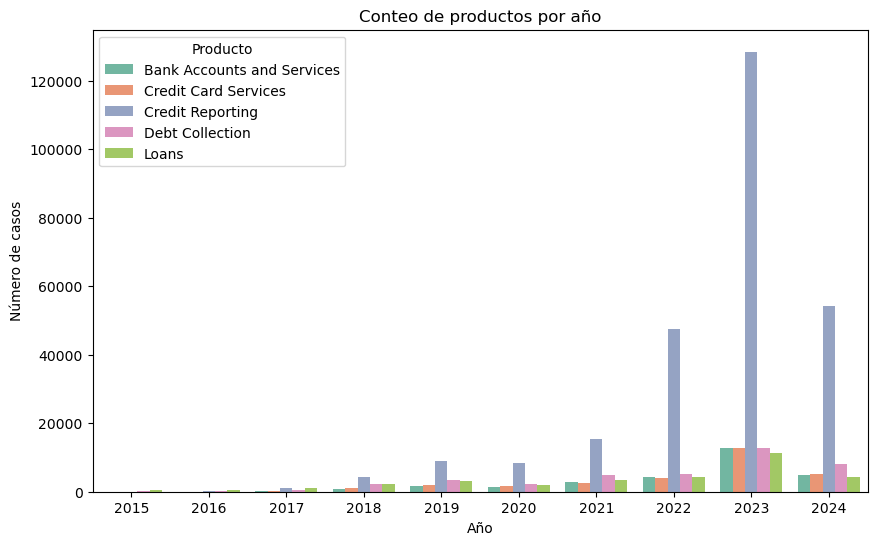

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.barplot(
    data=df_grouped_year,
    x='Year',
    y='Complaints',
    hue='product_5',  # Cada color será una categoría diferente
    palette='Set2'    # Puedes cambiar la paleta de colores
)

# Títulos y etiquetas
plt.title('Conteo de productos por año')
plt.xlabel('Año')
plt.ylabel('Número de casos')
plt.legend(title='Producto')

# Mostrar el gráfico
plt.show()

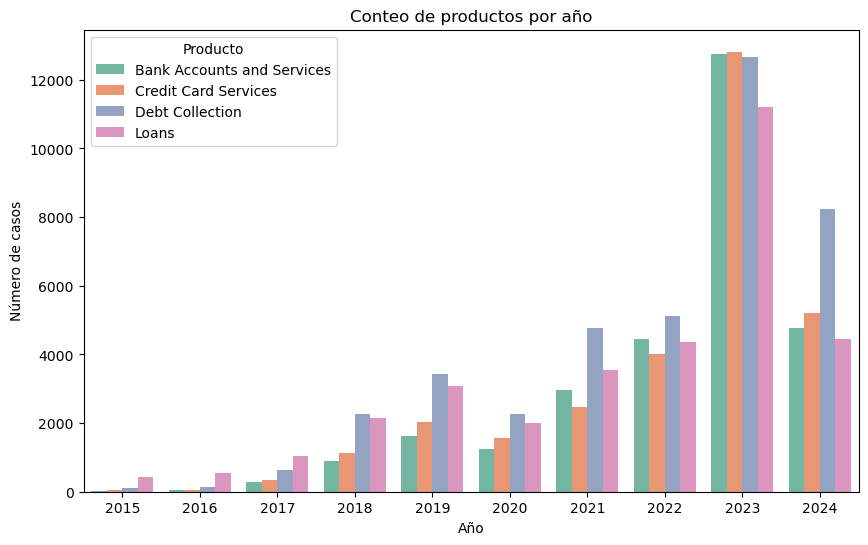

In [14]:
plt.figure(figsize=(10, 6))

df_grouped_year_without_creditreporting = df_grouped_year[
    df_grouped_year['product_5'] != 'Credit Reporting'
]

sns.barplot(
    data=df_grouped_year_without_creditreporting,
    x='Year',
    y='Complaints',
    hue='product_5',  # Cada color será una categoría diferente
    palette='Set2'    # Puedes cambiar la paleta de colores
)

# Títulos y etiquetas
plt.title('Conteo de productos por año')
plt.xlabel('Año')
plt.ylabel('Número de casos')
plt.legend(title='Producto')

# Mostrar el gráfico
plt.show()

In [15]:
import numpy as np

print(df_sample.narrative.iloc[np.random.randint(0, df_sample.shape[0])])

I do not recognize these inquiries and i've asked for them to be removed and the bureau haven't did as i asked. i am providing an identity report attached to this and i am requesting the inquiries to be removed. because they are inaccurate and are not mine. 

XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX 

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
df_sample_v2 = df_sample.sample(frac=0.1, random_state=10)

In [18]:
print(df_sample_v2.shape)

(40000, 11)


In [19]:
# Define the mapping
category_mapping = {
    'Credit Reporting': 0,
    'Debt Collection': 1,
    'Loans': 2,
    'Credit Card Services': 3,
    'Bank Accounts and Services': 4
}

# Recode the 'product_5' variable
df_sample_v2['product_5'] = df_sample_v2['product_5'].map(category_mapping)

In [21]:
import re

# Lista de stopwords en inglés (puedes agregar o quitar si quieres ajustar)
ENGLISH_STOPWORDS = set([
    'a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an',
    'and', 'any', 'are', 'as', 'at', 'be', 'because', 'been', 'before',
    'being', 'below', 'between', 'both', 'but', 'by', 'could', 'did', 'do',
    'does', 'doing', 'down', 'during', 'each', 'few', 'for', 'from', 'further',
    'had', 'has', 'have', 'having', 'he', 'her', 'here', 'hers', 'herself',
    'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'it',
    'its', 'itself', 'just', 'me', 'more', 'most', 'my', 'myself', 'no', 'nor',
    'not', 'now', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our',
    'ours', 'ourselves', 'out', 'over', 'own', 'same', 'she', 'should', 'so',
    'some', 'such', 'than', 'that', 'the', 'their', 'theirs', 'them',
    'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 'through',
    'to', 'too', 'under', 'until', 'up', 'very', 'was', 'we', 'were', 'what',
    'when', 'where', 'which', 'while', 'who', 'whom', 'why', 'with', 'would',
    'you', 'your', 'yours', 'yourself', 'yourselves'
])

# Expresiones regulares para limpieza de texto
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')  # Mantener solo caracteres válidos

# Función para limpiar el texto
def clean_text(text):
    """
    text: string
    return: string limpio y preprocesado
    """
    text = str(text).lower()                               # Convertir a minúsculas
    text = REPLACE_BY_SPACE_RE.sub(' ', text)              # Reemplazar ciertos símbolos por espacio
    text = BAD_SYMBOLS_RE.sub('', text)                    # Eliminar símbolos no deseados
    text = ' '.join(word for word in text.split() if word not in ENGLISH_STOPWORDS)  # Eliminar stopwords
    return text

# Aplicar limpieza a la columna 'narrative'
df_sample_v2['cleaned_narrative'] = df_sample_v2['narrative'].apply(clean_text)

# Verificar el resultado
print(df_sample_v2[['narrative', 'cleaned_narrative']].head())


                                                narrative  \
633090  I am submitting this complaint to you to infor...   
538011  I recently reviewed my credit report and notic...   
44838   I spoke with the company in XXXX and was told ...   
129795  When I reinvestigated my credit report, I real...   
143810  I received a collection call from the company ...   

                                        cleaned_narrative  
633090  submitting complaint inform xxxx xxxxxxxx xxxx...  
538011  recently reviewed credit report noticed many h...  
44838   spoke company xxxx told reduce payment interes...  
129795  reinvestigated credit report realized accounts...  
143810  received collection call company xxxxxxxx xxxx...  


In [22]:
tfidf = TfidfVectorizer(
    max_features=500,
    ngram_range=(1, 2)
)

X_tdfidf = tfidf.fit_transform(df_sample_v2['narrative'])

print(X_tdfidf.shape)

(40000, 500)


In [23]:
from sklearn.model_selection import train_test_split

y = df_sample_v2['product_5']

X_train, X_test, y_train, y_test = train_test_split(X_tdfidf, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32000, 500) (8000, 500) (32000,) (8000,)


In [24]:
# classifier

def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Blues):
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title(title)
    plt.tight_layout()
    plt.show()

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.096658 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 127457
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 500
[LightGBM] [Info] Start training from score -0.402906
[LightGBM] [Info] Start training from score -2.301336
[LightGBM] [Info] Start training from score -2.491554
[LightGBM] [Info] Start training from score -2.602424
[LightGBM] [Info] Start training from score -2.595280
Training time for lightgbm: 27.6475 seconds
Prediction time for lightgbm: 0.1135 seconds
lightgbm Accuracy: 0.8742
Classification Report for lightgbm:

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      5453
           1       0.71      0.63      0.66       753
           2       0.79      0.74      0.76       634
           3       0.72      0.67      0.69       561
           4   

/home/diego/miniconda3/envs/py312/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


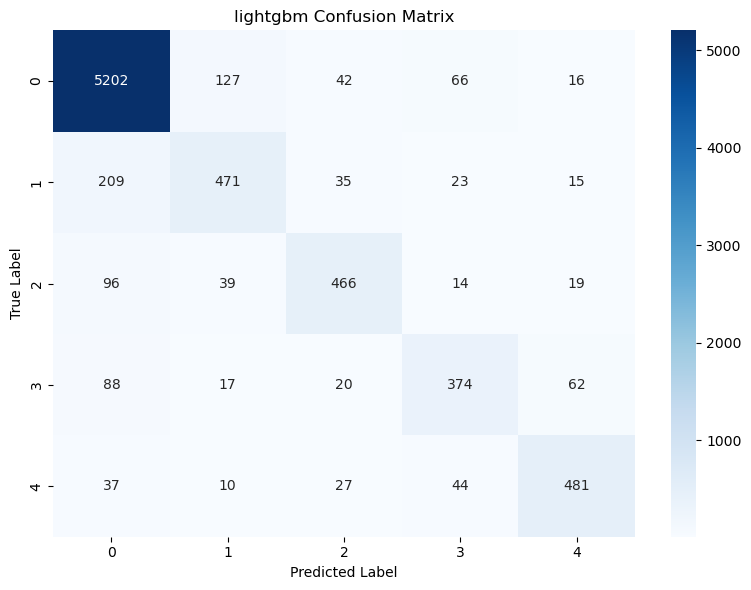

In [25]:
import time
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from lightgbm import LGBMClassifier

clf = LGBMClassifier(random_state=42)

start_time = time.time()
    
# Train the classifier
clf.fit(X_train, y_train)

# Measure end time for training
train_time = time.time() - start_time
print(f"Training time for lightgbm: {train_time:.4f} seconds")

# Measure start time for prediction
start_time = time.time()

# Predict
y_pred = clf.predict(X_test)

# Measure end time for prediction
prediction_time = time.time() - start_time
print(f"Prediction time for lightgbm: {prediction_time:.4f} seconds")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"lightgbm Accuracy: {accuracy:.4f}")

# Classification report
print(f"Classification Report for lightgbm:\n")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plot_confusion_matrix(cm, classes=clf.classes_, title=f"lightgbm Confusion Matrix")


In [26]:
def predecir_texto(texto, vectorizer, modelo):
    # 1. Preprocesar el texto si es necesario
    # Esto depende de tu pipeline; si hiciste limpieza, hazla acá también.

    # 2. Transformar el texto al vector TF-IDF (igual que hiciste con X_train)
    texto_vectorizado = vectorizer.transform([texto])  # ¡Va una lista!

    # 3. Hacer la predicción
    prediccion = modelo.predict(texto_vectorizado)

    # 4. Si quieres saber la probabilidad por cada clase:
    probabilidades = modelo.predict_proba(texto_vectorizado)

    return prediccion[0], probabilidades


In [27]:
nuevo_texto = "I had a problem with my credit report and need help!"

prediccion, proba = predecir_texto(nuevo_texto, tfidf, clf)

print(f"Predicción: {prediccion}")
print(f"Probabilidades por clase: {proba}")


Predicción: 0
Probabilidades por clase: [[0.8957296  0.06442608 0.02624707 0.01104189 0.00255536]]


/home/diego/miniconda3/envs/py312/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/home/diego/miniconda3/envs/py312/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [28]:
prediccion_idx = list(clf.classes_).index(prediccion)
print(f"Probabilidad de la predicción '{prediccion}': {proba[0][prediccion_idx]:.4f}")



Probabilidad de la predicción '0': 0.8957


In [30]:
import joblib
import os
from datetime import datetime

# Obtener fecha actual
date = datetime.now().strftime("%Y-%m-%d")

# Definir paths de los modelos
model_dir = f'../model/v_{date}'
vectorizer_dir = f'../model/vector_{date}'

# Crear los directorios si no existen
os.makedirs(model_dir, exist_ok=True)
os.makedirs(vectorizer_dir, exist_ok=True)

# Guardar el modelo y el vectorizador
joblib.dump(clf, f'{model_dir}/model_{date}.pkl')
joblib.dump(tfidf, f'{vectorizer_dir}/vectorizer_{date}.pkl')

print(f'Modelo guardado en: {model_dir}/model_{date}.pkl')
print(f'Vectorizador guardado en: {vectorizer_dir}/vectorizer_{date}.pkl')


Modelo guardado en: ../model/v_2025-03-14/model_2025-03-14.pkl
Vectorizador guardado en: ../model/vector_2025-03-14/vectorizer_2025-03-14.pkl


In [3]:
import joblib

# Cargar el modelo
clf = joblib.load('../model/v_2025-03-14/model_2025-03-14.pkl')

# Cargar el vectorizador si lo necesitas
tfidf = joblib.load('../model/vector_2025-03-14/vectorizer_2025-03-14.pkl')

# Ver el tipo de modelo cargado
print(type(clf))  # Probablemente un LGBMClassifier o algo similar


<class 'lightgbm.sklearn.LGBMClassifier'>


In [7]:
print(type(tfidf))

<class 'sklearn.feature_extraction.text.TfidfVectorizer'>


In [ ]:
# Supongamos que necesitas transformar un texto de prueba
texts = ["I had a problem with my credit report and need help!"]

# Lo conviertes usando el vectorizador que guardaste
X_test = tfidf.transform(texts)

# Haces la predicción
pred = clf.predict(X_test)

print(pred)


[0]


/home/diego/miniconda3/envs/py312/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [5]:
path_vectorize = '../model/vector_2025-03-14/vectorizer_2025-03-14.pkl'

print(type(path_vectorize))

<class 'str'>


In [6]:
print(type(tfidf))

<class 'sklearn.feature_extraction.text.TfidfVectorizer'>
